In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

# this function is used to update the plots for each epoch and error
def plt_dynamic(epoch_list, validation_loss_list, training_loss_list, ax):
    ax.plot(epoch_list, validation_loss_list, 'b', label="Validation Loss")
    ax.plot(epoch_list, training_loss_list, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# validation_loss_list is having the loss on validation dataset at each epoch. i.e after every epoch, whatever weights
# we get, we calculate loss on that instead of taking average, which we did using tensorflow. --> this is not true

# OR it could have taken average of all losses within a epoch. Both approaches are fine. ---> this is absolutely true.
# Whatever was happening in tensorflow, same thing is happening here also.

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0]) # one image

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [9]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [12]:
# https://keras.io/getting-started/sequential-model-guide/
# The Sequential model is a linear stack of layers.

###

# https://keras.io/layers/core/
# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/
# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [13]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1] # 784

batch_size = 128 
nb_epoch = 20

In [14]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [15]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# it is taking average of all losses, for all batches, within a epoch --> this is absolutely true.
# Whatever was happening in tensorflow, same thing is happening here also.

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 18us/step - loss: 1.3006 - acc: 0.6791 - val_loss: 0.8208 - val_acc: 0.8277
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.7233 - acc: 0.8380 - val_loss: 0.6130 - val_acc: 0.8617
Epoch 3/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.5917 - acc: 0.8570 - val_loss: 0.5299 - val_acc: 0.8746
Epoch 4/20
60000/60000 [==============================] - 1s 15us/step - loss: 0.5289 - acc: 0.8673 - val_loss: 0.4834 - val_acc: 0.8805
Epoch 5/20
60000/60000 [==============================] - 1s 16us/step - loss: 0.4908 - acc: 0.8739 - val_loss: 0.4533 - val_acc: 0.8845
Epoch 6/20
60000/60000 [==============================] - 1s 14us/step - loss: 0.4646 - acc: 0.8787 - val_loss: 0.4317 

In [16]:
history

In [17]:
history.model

In [18]:
import numpy as np

In [19]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [20]:
print(history.history.keys())
# history.history is a dictionary.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [21]:
print(history.history.values())
# losses and accuracies for each epoch, for validation and training set.

dict_values([[0.8208426730155944, 0.6130134362220764, 0.5299458559989929, 0.4833739689826965, 0.4533498282432556, 0.4316823471069336, 0.41563813724517823, 0.4024308386325836, 0.39190588321685793, 0.3829470253944397, 0.3756546667098999, 0.36914921531677247, 0.36349963097572324, 0.35857266268730165, 0.3540258561849594, 0.3500982654094696, 0.34644142632484437, 0.34309201848506926, 0.3400643067359924, 0.3372706847667694], [0.8277, 0.8617, 0.8746, 0.8805, 0.8845, 0.8891, 0.8918, 0.8941, 0.8964, 0.8991, 0.8998, 0.9009, 0.9022, 0.9034, 0.9041, 0.9049, 0.9053, 0.906, 0.907, 0.9074], [1.3005664028167725, 0.7233132252057394, 0.5917136756896972, 0.5289364106973012, 0.4907781376838684, 0.4645813840389252, 0.44515748410224915, 0.4300900042851766, 0.4178776428381602, 0.40776353430747986, 0.39921346753438314, 0.39181379961967466, 0.38538467014630634, 0.37958967248598735, 0.3745870690663656, 0.36994150314331053, 0.3658098151048024, 0.36201985874176024, 0.3585408500512441, 0.3553346565723419], [0.67906

In [22]:
print(history.history.items())

dict_items([('val_loss', [0.8208426730155944, 0.6130134362220764, 0.5299458559989929, 0.4833739689826965, 0.4533498282432556, 0.4316823471069336, 0.41563813724517823, 0.4024308386325836, 0.39190588321685793, 0.3829470253944397, 0.3756546667098999, 0.36914921531677247, 0.36349963097572324, 0.35857266268730165, 0.3540258561849594, 0.3500982654094696, 0.34644142632484437, 0.34309201848506926, 0.3400643067359924, 0.3372706847667694]), ('val_acc', [0.8277, 0.8617, 0.8746, 0.8805, 0.8845, 0.8891, 0.8918, 0.8941, 0.8964, 0.8991, 0.8998, 0.9009, 0.9022, 0.9034, 0.9041, 0.9049, 0.9053, 0.906, 0.907, 0.9074]), ('loss', [1.3005664028167725, 0.7233132252057394, 0.5917136756896972, 0.5289364106973012, 0.4907781376838684, 0.4645813840389252, 0.44515748410224915, 0.4300900042851766, 0.4178776428381602, 0.40776353430747986, 0.39921346753438314, 0.39181379961967466, 0.38538467014630634, 0.37958967248598735, 0.3745870690663656, 0.36994150314331053, 0.3658098151048024, 0.36201985874176024, 0.358540850051

Test score: 0.337270687353611
Test accuracy: 0.9074


<IPython.core.display.Javascript object>


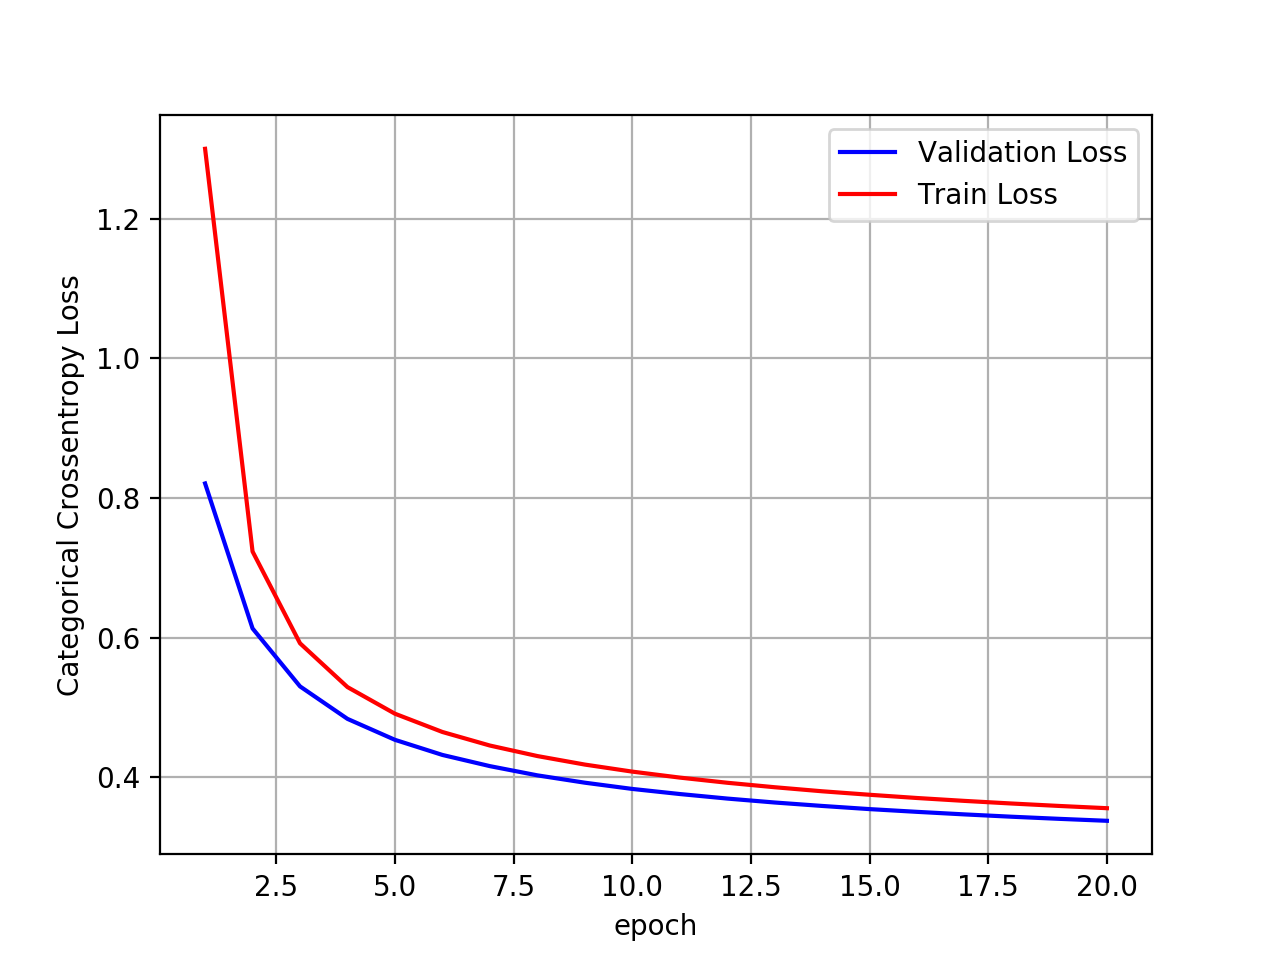

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)  # default batch_size is 32
print('Test score:', score[0])  # this is test loss computed in batches, default batch_size is 32
print('Test accuracy:', score[1]) # average test accuracies or calculate it at the end, after all the batches are evaluated.

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
epoch_list = list(range(1,nb_epoch+1)) # np.array(history.epoch) + np.array(1)

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

validation_loss_list = history.history['val_loss'] # validation loss for each 
training_loss_list = history.history['loss']
plt_dynamic(epoch_list, validation_loss_list, training_loss_list, ax)

 <h3>  MLP + Sigmoid activation + SGDOptimizer (Sigmoid + SGD)</h3>

In [26]:
print(input_dim," , ",output_dim)

784  ,  10


In [28]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

In [29]:
model_sigmoid.weights

[<tf.Variable 'dense_5/kernel:0' shape=(784, 512) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(512, 128) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_7/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32_ref>]

In [31]:
model_sigmoid.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 2.2619 - acc: 0.2341 - val_loss: 2.2140 - val_acc: 0.5558
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 2.1680 - acc: 0.4717 - val_loss: 2.1080 - val_acc: 0.6505
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 2.0440 - acc: 0.5904 - val_loss: 1.9577 - val_acc: 0.6274
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 1.8682 - acc: 0.6475 - val_loss: 1.7509 - val_acc: 0.7010
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 1.6453 - acc: 0.6941 - val_loss: 1.5099 - val_acc: 0.7222
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 1.4103 - acc: 0.7298 - val_loss: 1.2826 - val_acc: 0.7693
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 1.2043 - acc: 0.7601 - val_loss: 1.0986 - val_acc

10000/10000 [==============================] - 1s 56us/step
Test score: 0.45629552040100096
Test accuracy: 0.8768


<IPython.core.display.Javascript object>


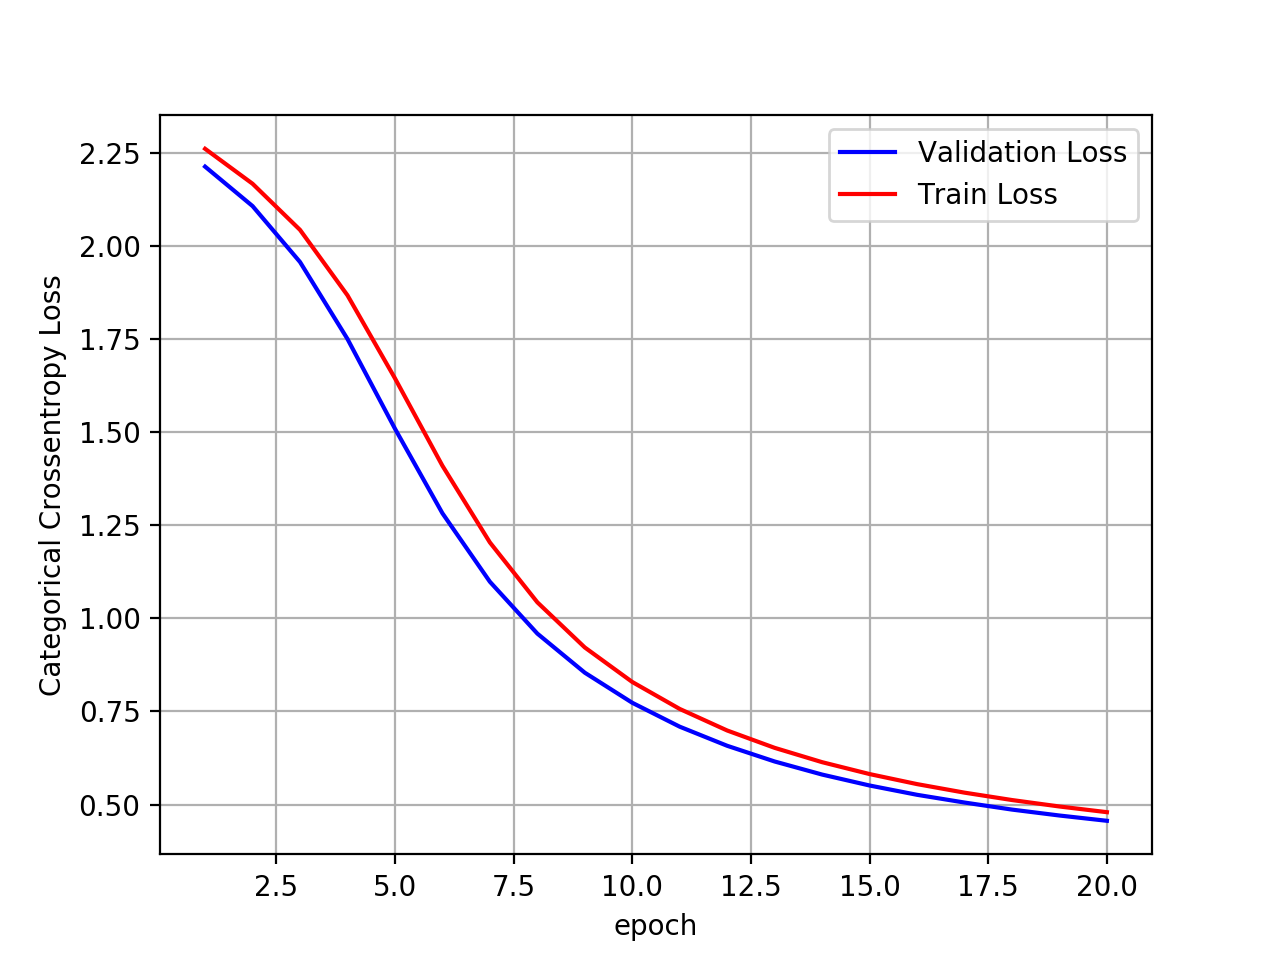

In [33]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=1)  # default batch_size is 32
print('Test score:', score[0])  # this is test loss computed in batches, default batch_size is 32
print('Test accuracy:', score[1]) # average test accuracies or calculate it at the end, after all the batches are evaluated.

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
epoch_list = list(range(1,nb_epoch+1)) # np.array(history.epoch) + np.array(1)

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

validation_loss_list = history.history['val_loss'] # validation loss for each 
training_loss_list = history.history['loss']
plt_dynamic(epoch_list, validation_loss_list, training_loss_list, ax)

In [40]:
model_sigmoid.weights

[<tf.Variable 'dense_5/kernel:0' shape=(784, 512) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(512,) dtype=float32_ref>,
 <tf.Variable 'dense_6/kernel:0' shape=(512, 128) dtype=float32_ref>,
 <tf.Variable 'dense_6/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_7/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_7/bias:0' shape=(10,) dtype=float32_ref>]

In [42]:
weights_after_training = model_sigmoid.get_weights() # including bias for each layer.
len(weights_after_training) # length is 6 including all weights and biases

6

<IPython.core.display.Javascript object>


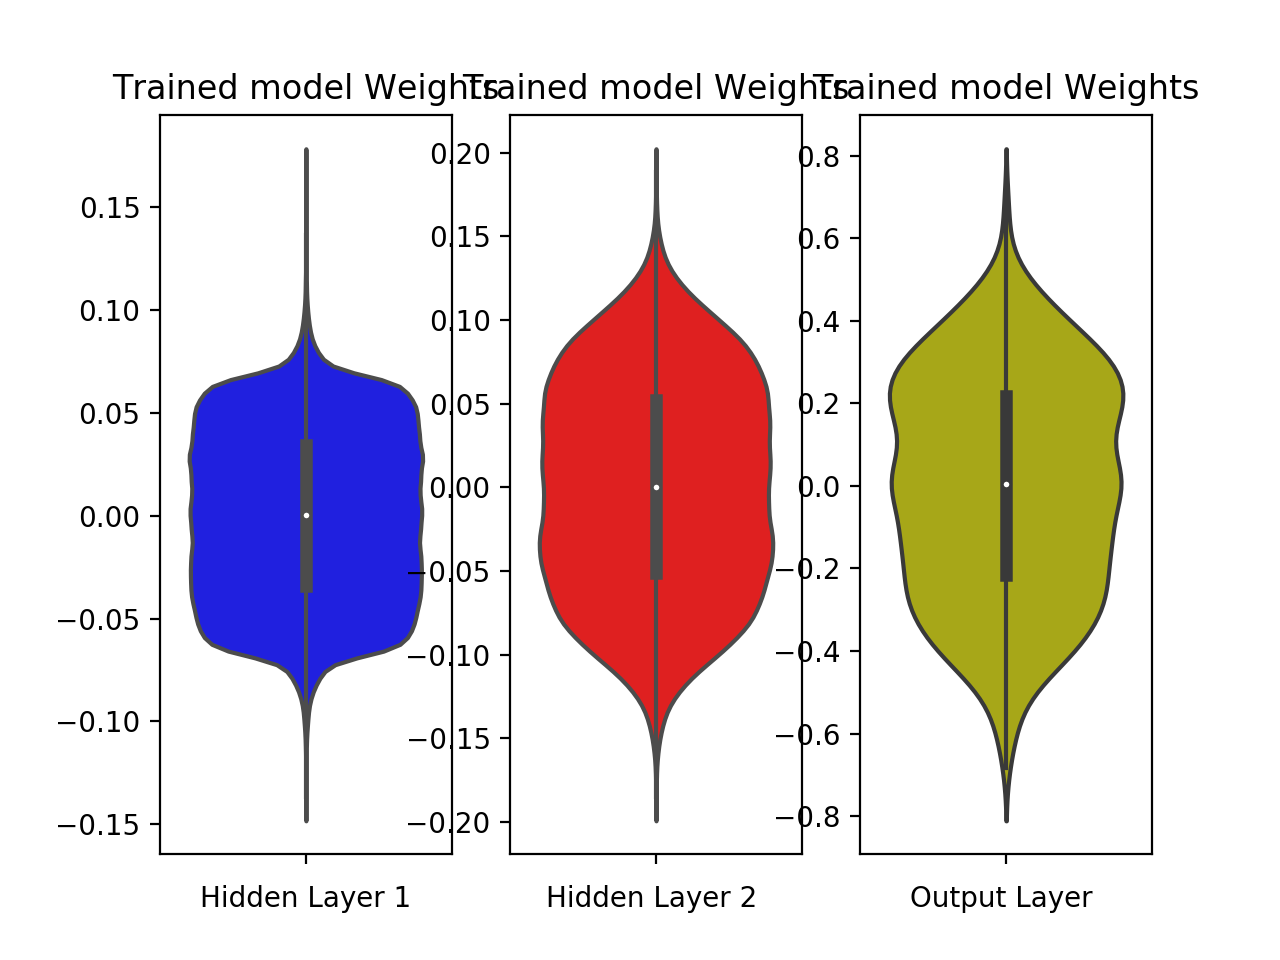

In [43]:
w_after = model_sigmoid.get_weights() # weights after training

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>MLP + Sigmoid activation + ADAM </h2>